<a href="https://colab.research.google.com/github/modhudeb/Irish-Prediction-Suvervised-Classification/blob/main/irishPred1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## laoding data

In [2]:
data =  pd.read_csv("iris_.csv", index_col= "ID")

In [3]:
df = data.copy()

# Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       149 non-null    float64
 1   SW       149 non-null    float64
 2   PL       149 non-null    float64
 3   PW       149 non-null    float64
 4   Species  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [6]:
# handling object data
encoder = LabelEncoder()
df.Species = encoder.fit_transform(df.Species)


#standarization
df[['SL','SW','PL','PW']] = StandardScaler().fit_transform(df[['SL','SW','PL','PW']])

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,149.0,2.384372e-16,1.003373,-1.874916,-0.906169,-0.058515,0.668045,2.484446
SW,149.0,-4.768743e-17,1.003373,-2.427478,-0.585623,-0.125160,0.565536,3.098086
PL,149.0,1.907497e-16,1.003373,-1.580865,-1.238911,0.356871,0.755816,1.781676
PW,149.0,-5.245618e-16,1.003373,-1.459544,-1.195621,0.123990,0.783796,1.707524
Species,149.0,1.006711e+00,0.817847,0.000000,0.000000,1.000000,2.000000,2.000000


## target, feature

In [8]:
df.head()

,SL,SW,PL,PW,Species
ID,,,,,
0,-1.148356,-0.125160,-1.352896,-1.327583,0
1,-1.390542,0.335304,-1.409888,-1.327583,0
2,-1.511636,0.105072,-1.295904,-1.327583,0
3,-1.027262,1.256231,-1.352896,-1.327583,0
4,-0.542889,1.946927,-1.181919,-1.063660,0


In [9]:
features = df.drop(columns=['Species'])
target = df.Species

In [10]:
features.shape
target.shape

(149,)

## Feature selection

In [11]:
from sklearn.feature_selection import mutual_info_regression

In [12]:
colScore = mutual_info_regression(features, target,n_neighbors=5, random_state=42)

In [13]:
colScore

array([0.49222168, 0.26495124, 0.99722659, 0.97912938])

In [14]:
colScorePD =  pd.DataFrame(colScore, index = features.columns, columns=['Scoresss'])
colScorePD.sort_values(by = 'Scoresss', ascending  =  False)

,Scoresss
PL,0.997227
PW,0.979129
SL,0.492222
SW,0.264951


## Model Selection

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size= 0.3, random_state=42)

In [17]:
xtrain.shape , ytrain.shape

((104, 4), (104,))

## Analysis

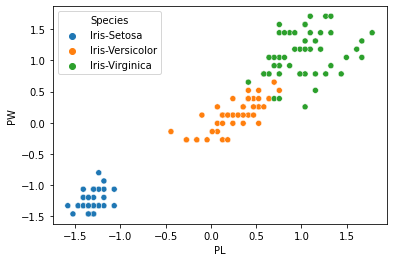

In [18]:
sns.scatterplot(x = features['PL'], y = features['PW'], hue = data.Species )

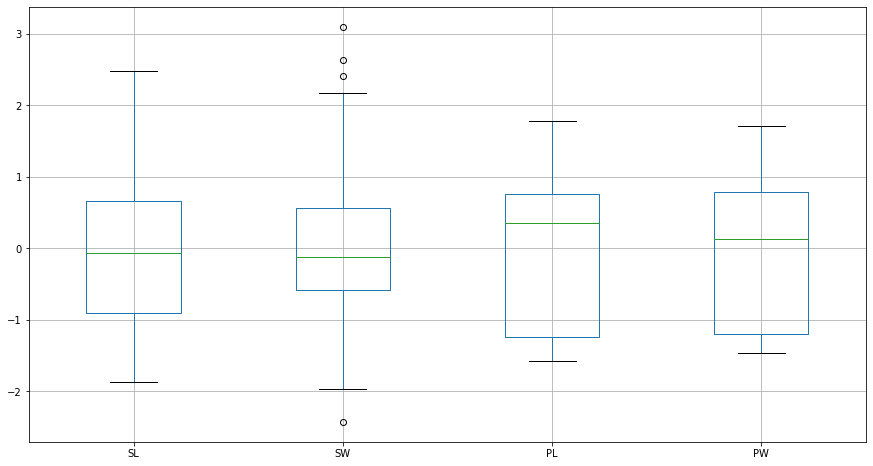

In [19]:
# sns.boxplot(data = features)
features.boxplot(figsize = (15,8))

# Algorithm

In [20]:
from sklearn.metrics import classification_report 

### Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(tol = 0.1, random_state=42).fit(xtrain[['PL', 'PW']],ytrain)

In [22]:
pred_train = Lr.predict(xtrain[['PL', 'PW']])
pred_test = Lr.predict(xtest[['PL', 'PW']])

In [23]:
res1 = classification_report(ytrain, pred_train)
res2 = classification_report(ytest, pred_test)

print(res1,"\n", res2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      1.00      0.97        37
           2       1.00      0.95      0.97        37

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=5).fit(xtrain[['PL', 'PW']], ytrain)
pred_train_kn = knn.predict(xtrain[['PL', 'PW']])
pred_test_kn = knn.predict(xtest[['PL', 'PW']])

res1 = classification_report(ytrain, pred_train_kn)
res2 = classification_report(ytest, pred_test_kn)

print(res1,"\n", res2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.99        37
           2       0.97      1.00      0.99        37

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



# Vizualizing

In [26]:
df[['PL','PW']].describe().T

,count,mean,std,min,25%,50%,75%,max
PL,149.0,1.907497e-16,1.003373,-1.580865,-1.238911,0.356871,0.755816,1.781676
PW,149.0,-5.245618e-16,1.003373,-1.459544,-1.195621,0.123990,0.783796,1.707524


In [33]:
# eida VUUUUUUUUUUUUULLLL ache...but tao por eida to understand the thik-thaak one. then next cell a jais bawa
# Meshgrid e ken use kormu..evabe kora jay kina try korlam..
# fake PL and PW 
xx1 = np.linspace(-1.580865, 1.781676, 90000)
xx2 = np.linspace(-1.459544	, 1.707524, 90000)
testData = np.c_[xx1,xx2]
# KNN prediction with fake PL and PW
predFake = knn.predict(testData)

predFake = np.reshape(predFake,(300,300))
xx1 = np.reshape(xx1,(300,300))
xx2 = np.reshape(xx2,(300,300))
predFake.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(300, 300)

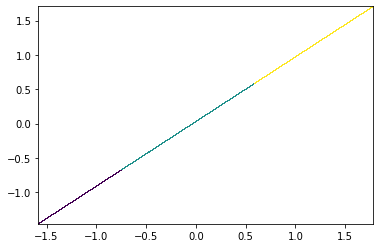

In [32]:
plt.pcolormesh(xx1,xx2, predFake)

In [29]:
x1,x2 = np.meshgrid(
    np.linspace(-1.580865, 1.781676, 300),
    np.linspace(-1.459544	, 1.707524, 306)
)
# xx1.shape
test_data = np.c_[x1.ravel(), x2.ravel()]
# test_data.shape
pred_fa = knn.predict(test_data)
pred_fake = np.reshape(pred_fa, x1.shape)
pred_fake.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(306, 300)

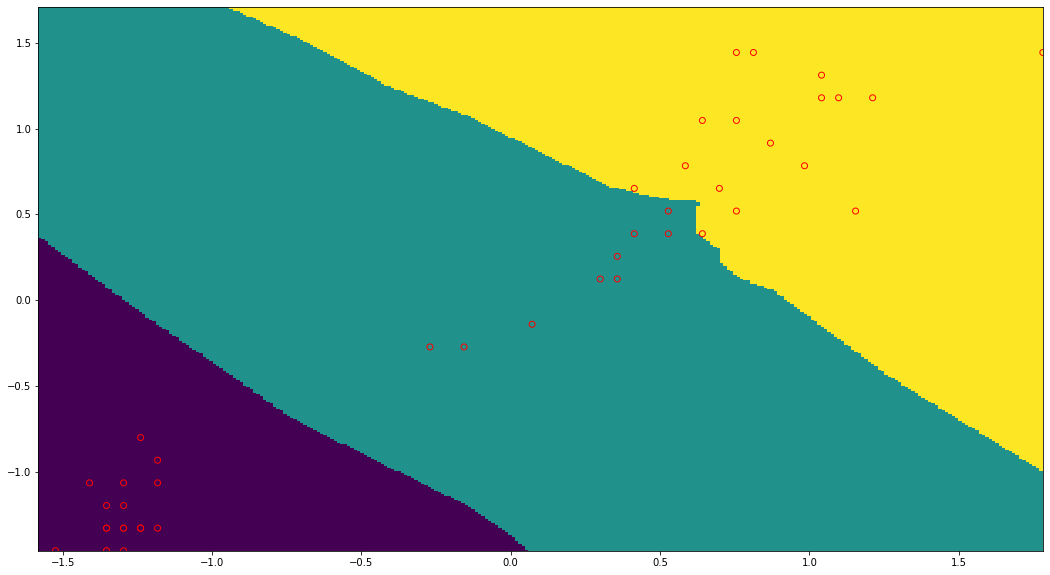

In [30]:
plt.figure(figsize=[18,10])
plt.pcolormesh(x1,x2,pred_fake)
plt.scatter(xtest['PL'], xtest['PW'], c=pred_test_kn, edgecolor='red')
plt.show()